In [1]:
import pandas as pd

%matplotlib inline
# tells Jupyter to display charts inline

df = pd.read_csv('survey_results_public.csv') 
# imports data

df.head() 
# displays first 5 rows of data (can input a number to display that many rows)
# does not display all columns



,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [2]:
df.shape
# gives size of data set (produced output is in the form (rows, columns))
# numbers should correspond to the number of respondents and questions from survey


(64461, 61)

In [3]:
df['Hobbyist'].value_counts() 
# aanalyzes single column of data at a time and counts how many instances of each unique entry that column contains
# need to specify the column

Yes    50388
No     14028
Name: Hobbyist, dtype: int64

In [4]:
df['Hobbyist'].value_counts(normalize = True)
# function defaults to normalize = False
# normalizing presents answers as percentages of the total number of the rows in the specified series
# will work for any MC question (does not have to be Yes/No)

Yes    0.782228
No     0.217772
Name: Hobbyist, dtype: float64

In [5]:
df['Trans'].value_counts(normalize = True)

No     0.990394
Yes    0.009606
Name: Trans, dtype: float64

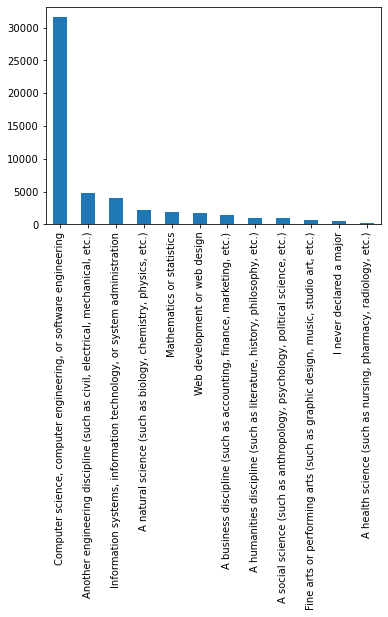

In [6]:
df['UndergradMajor'].value_counts().plot(kind = 'bar')
# .plot(kind = 'bar') takes what is given and plots the reuslts in a bar graph]
# can replace 'bar' with 'pie' for a pie chart instead

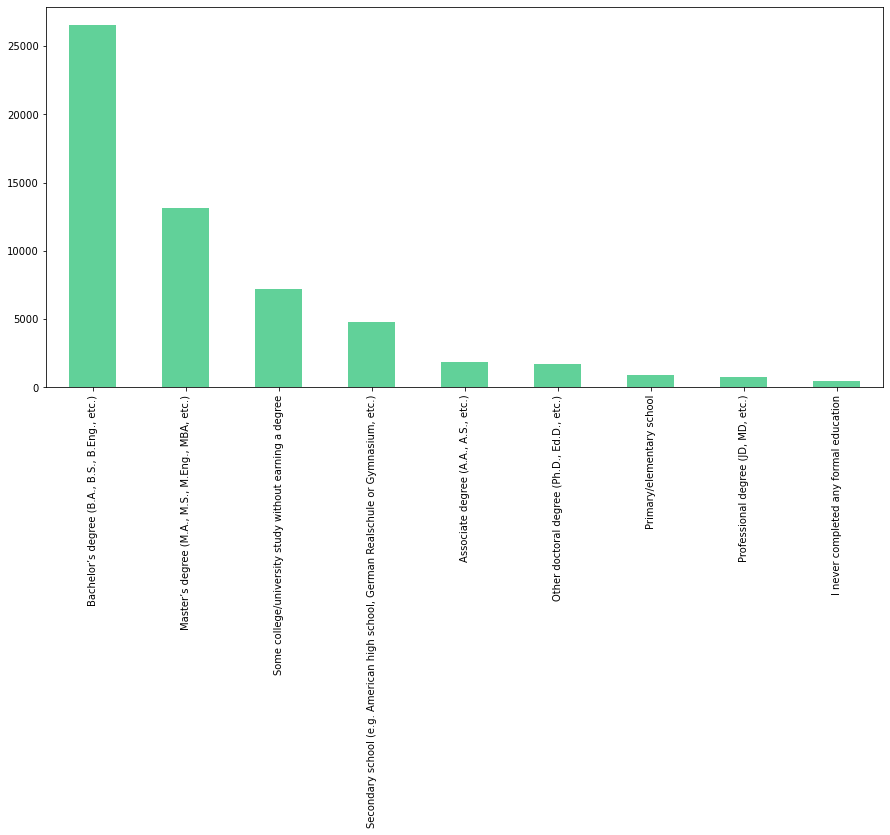

In [7]:
df['EdLevel'].value_counts().plot(kind = 'bar', figsize = (15, 7), color = "#61d199")

In [8]:
said_no_hobby = df[df['Hobbyist'] == 'No']
# create a variable that is equal to df, but only the rows in which the answer in the 'Hobbyist' column is 'No'

said_no_hobby.shape
# use to confirm that filter has worked 

(14028, 61)

In [9]:
said_no_hobby['Hobbyist'].value_counts()
# further confirmation

No    14028
Name: Hobbyist, dtype: int64

In [10]:
said_yes_hobby = df[df['Hobbyist'] == 'Yes']
# equivalent to said_no_hobby, but for the rows where the answer is 'Yes'

print(said_no_hobby['Age'].mean(),
      said_yes_hobby['Age'].mean(),
      said_no_hobby['Age'].median(),
      said_yes_hobby['Age'].median())
# calculates the median and mean of the ages in each respetive group

32.415208461696444 30.402926515066657 30.0 29.0


In [11]:
over_50 = df[df['Age'] >= 50]
under_25 = df[df['Age'] <= 25]

print(over_50['Hobbyist'].value_counts(normalize = True))
print(under_25['Hobbyist'].value_counts(normalize = True))

print(len(over_50))
print(len(under_25))
# len helps check sample sizes (produces the number of items in a list or rows in a DataFrame)

Yes    0.713656
No     0.286344
Name: Hobbyist, dtype: float64
Yes    0.832475
No     0.167525
Name: Hobbyist, dtype: float64
2270
14565


In [12]:
filtered_1 = df[(df['Hobbyist'] == 'Yes') & (df['Country'] == 'Germany')]

print(filtered_1['Hobbyist'].value_counts())
print(filtered_1['Country'].value_counts())
# confirm that assignment worked, clearly the DataFrame includes only people in Germany who answered 'Yes' to 'Hobbyist'

Yes    3249
Name: Hobbyist, dtype: int64
Germany    3249
Name: Country, dtype: int64


In [13]:
filtered_2 = df[(df['Country'] == 'Germany') &~ (df['Hobbyist'] == 'Yes') & (df['Age'] >= 45) &~ (df['JobSeek'] == 'I am not interested in new job opportunities') &~ (df['OpSys'] == 'Windows')]
filtered_2
# filters for people who:
#  - Live in Germany
#  - Are not hobbyists
#  - Are over the age of 45
#  - Are at least open to job opportunities
#  - Do not use Windows

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
11493,11531,I am a developer by profession,No,54.0,16,Yearly,52000.0,56211.0,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,35.0,39,25
12465,12504,I am a developer by profession,No,47.0,Younger than 5 years,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"A natural science (such as biology, chemistry,...",NaN,NaN,Just as welcome now as I felt last year,50.0,1,Less than 1 year
16377,16434,I am a developer by profession,No,45.0,28,Monthly,45000.0,583728.0,Germany,European Euro,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js;Spring,Express;jQuery;React.js,Just as welcome now as I felt last year,8.0,10,9
18107,18175,I am a developer by profession,No,50.0,12,Yearly,70000.0,75669.0,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",React.js,Spring,Just as welcome now as I felt last year,45.0,38,26
21766,21851,I am a developer by profession,No,45.0,10,NaN,NaN,NaN,Germany,European Euro,...,Easy,Too long,No,"Information systems, information technology, o...",NaN,NaN,Just as welcome now as I felt last year,40.0,27,17
21924,22009,"I am not primarily a developer, but I write co...",No,46.0,15,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,Mathematics or statistics,NaN,NaN,Somewhat less welcome now than last year,38.0,26,18
24808,24900,"I am not primarily a developer, but I write co...",No,49.0,15,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"A natural science (such as biology, chemistry,...",NaN,NaN,Just as welcome now as I felt last year,60.0,34,20
50813,51863,I am a developer by profession,No,48.0,16,Yearly,120000.0,129718.0,Germany,European Euro,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,React.js;Spring,NaN,40.0,32,25
54773,55884,I am a developer by profession,No,58.0,16,NaN,NaN,NaN,Germany,European Euro,...,Easy,Too long,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,40.0,42,38
58527,59679,"I am not primarily a developer, but I write co...",No,47.0,13,Yearly,110000.0,118908.0,Germany,European Euro,...,Easy,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,NaN,Just as welcome now as I felt last year,40.0,10,4


In [14]:
df['LanguageWorkedWith'].head()
# determine the format in which multi-answer survey questions were stored
# i.e. each answer in separate column, or all of a respondent's answers could be stored in a single column with some sort of delimiter between each answer

0      C#;HTML/CSS;JavaScript
1            JavaScript;Swift
2    Objective-C;Python;Swift
3                         NaN
4           HTML/CSS;Ruby;SQL
Name: LanguageWorkedWith, dtype: object

In [15]:
python_bool = df['LanguageWorkedWith'].str.contains('Python')
# Series.str.contains() looks at each row in the series and determines whether it contains whatever string we give it as an argument
# in this case, the above assignment gives us a boolean series, which we then use value_counts() on to determine the number of 'True' responses in this series

python_bool.value_counts(normalize = True)

False    0.559291
True     0.440709
Name: LanguageWorkedWith, dtype: float64

In [16]:
lang_lists = df['LanguageWorkedWith'].str.split(';', expand = True)
# Series.str.split splits each row in the series based on a delimiter passed to the function (in this case, ';')
# can also add an extra argument (expand = True) which will create a new dataframe from our series by making each language its own column
#  - each row still represents one respondent

lang_lists.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,C#,HTML/CSS,JavaScript,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,JavaScript,Swift,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Objective-C,Python,Swift,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HTML/CSS,Ruby,SQL,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [18]:
# The following line determines how many times each lang was mentiones
# value_counts() only works on panda series, not dataframes
# df.stack() essentially sliced each column and then stacks them on top of each other
#  - basically every data point in the dataframe appears in a single panda series
# then use value_counts() on this stacked series 

lang_lists.stack().value_counts()

# note: cannot use (normalize = True) since this calc is based on the length of the series, and the length of this stacked series is different than the number of responses in the original dataframe 


JavaScript               38822
HTML/CSS                 36181
SQL                      31413
Python                   25287
Java                     23074
Bash/Shell/PowerShell    18980
C#                       18041
PHP                      15007
TypeScript               14578
C++                      13707
C                        12487
Go                        5038
Kotlin                    4468
Ruby                      4046
Assembly                  3553
VBA                       3499
Swift                     3397
R                         3288
Rust                      2929
Objective-C               2340
Dart                      2280
Scala                     2052
Perl                      1796
Haskell                   1222
Julia                      519
dtype: int64

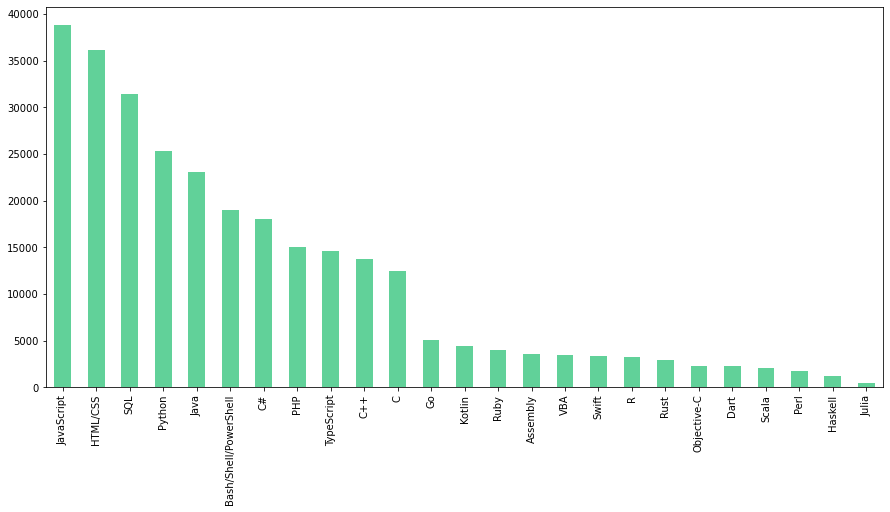

In [19]:
lang_lists.stack().value_counts().plot(kind = 'bar', figsize = (15, 7), color = "#61d199")